In [131]:
# -*- coding: utf-8 -*-
from pandas import read_csv, DataFrame

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as st
import statsmodels.api as sm

import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import product
import warnings
from sklearn.metrics import r2_score



# Часть 1.  Считывание. Визуальная оценка. Тест Дики-Фуллера.

In [132]:
#Create DataFrame
ts = pd.read_csv('training.csv', parse_dates = ['Date'], index_col = 'Date')


## Анализ временного ряда

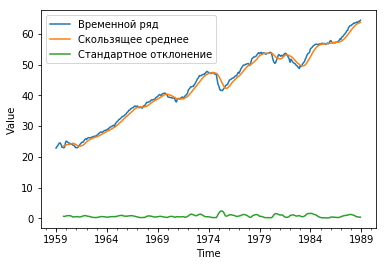

In [133]:
axes = ts.plot()
mean = ts.rolling(window=10).mean()
std = ts.rolling(window=10).std()

mean.plot(ax = axes)
std.plot(ax = axes)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Временной ряд', 'Скользящее среднее', 'Стандартное отклонение'])

plt.show()


## Тест Дики-Фуллера. Вывод 1-ой части.

In [134]:
def DickeyFuller(data):
    test = st.adfuller(data.Value)
    
    print('adf: ', test[0])
    print('p-value: ', test[1])
    print('Critical values: ', test[4])

    print('\nРезультаты теста Дики-Фуллера:')
    
    if test[0] > test[4]['5%']:
        print ('Единичный корень существует, временной ряд не стационарен')
        return False
    else:
        print ('Единичных корней нет, временной ряд стационарен')
        return True

    
DickeyFuller(ts)

adf:  -0.253391179928
p-value:  0.931851042299
Critical values:  {'10%': -2.5711381780459002, '5%': -2.869739378430086, '1%': -3.4489583388155194}

Результаты теста Дики-Фуллера:
Единичный корень существует, временной ряд не стационарен


False

# Часть 2. Анализ временного ряда на тренд, сезонность и остаток

## Аддитивная модель. Визуализация и оценка стационарности.

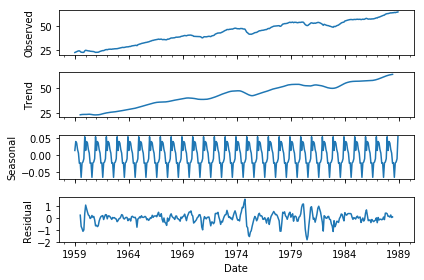

Проверка тренда на стационарность
adf:  -0.861576033358
p-value:  0.800362576153
Critical values:  {'10%': -2.5714576124885218, '5%': -2.8703384787266608, '1%': -3.4503224123605194}
Единичный корень существует, временной ряд не стационарен

______________________________________________

Проверка сезонности на стационарность
adf:  -3.65168561236e+14
p-value:  0.0
Critical values:  {'10%': -2.5712138845950587, '5%': -2.8698813715275406, '1%': -3.4492815848836296}
Единичных корней нет, временной ряд стационарен

______________________________________________

Проверка остатка на стационарность
adf:  -7.48556383377
p-value:  4.64909667469e-11
Critical values:  {'10%': -2.5712922615505627, '5%': -2.870028369720798, '1%': -3.4496162602188187}
Единичных корней нет, временной ряд стационарен

______________________________________________


In [135]:
result_a = seasonal_decompose(ts, model='additive')
result_a.plot()
plt.show()
result_a.trend.dropna(inplace=True)  # удаляет значения nan и inf
result_a.seasonal.dropna(inplace=True)
result_a.resid.dropna(inplace=True)

print('Проверка тренда на стационарность')
test = st.adfuller(result_a.trend.iloc[:, 0].values, autolag='AIC')
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Единичный корень существует, временной ряд не стационарен')
else:
    print('Единичных корней нет, временной ряд стационарен')
print('\n______________________________________________')

print('\nПроверка сезонности на стационарность')
test = st.adfuller(result_a.seasonal.iloc[:, 0].values, autolag='AIC')
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Единичный корень существует, временной ряд не стационарен')
else:
    print('Единичных корней нет, временной ряд стационарен')
print('\n______________________________________________')
    

print('\nПроверка остатка на стационарность')
test = st.adfuller(result_a.resid.iloc[:, 0].values, autolag='AIC')
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Единичный корень существует, временной ряд не стационарен')
else:
    print('Единичных корней нет, временной ряд стационарен')
print('\n______________________________________________')

## Мультипликативная модель. Визуализация и оценка стационарности.

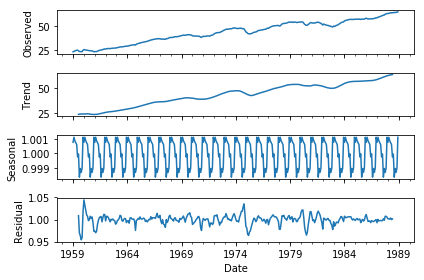

Тренд
adf:  -0.861576033358
p-value:  0.800362576153
Critical values:  {'10%': -2.5714576124885218, '5%': -2.8703384787266608, '1%': -3.4503224123605194}
Единичный корень существует, временной ряд не стационарен

Сезонность
adf:  -2.80185436709e+13
p-value:  0.0
Critical values:  {'10%': -2.5712267582157482, '5%': -2.8699055166063085, '1%': -3.4493365542737222}
Единичных корней нет, временной ряд стационарен

nОстаток
adf:  -7.46608373979
p-value:  5.20019389833e-11
Critical values:  {'10%': -2.5712922615505627, '5%': -2.870028369720798, '1%': -3.4496162602188187}
Единичных корней нет, временной ряд стационарен



In [136]:
result_a = seasonal_decompose(ts, model='multiplicative')
result_a.plot()
plt.show()
result_a.trend.dropna(inplace=True)  # удаляет значения nan и inf
result_a.seasonal.dropna(inplace=True)
result_a.resid.dropna(inplace=True)

print('Тренд')
test = st.adfuller(result_a.trend.iloc[:, 0].values, autolag='AIC')
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Единичный корень существует, временной ряд не стационарен')
else:
    print('Единичных корней нет, временной ряд стационарен')


print('\nСезонность')
test = st.adfuller(result_a.seasonal.iloc[:, 0].values, autolag='AIC')
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Единичный корень существует, временной ряд не стационарен')
else:
    print('Единичных корней нет, временной ряд стационарен')

print()

print('nОстаток')
test = st.adfuller(result_a.resid.iloc[:, 0].values, autolag='AIC')
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0] > test[4]['5%']:
    print('Единичный корень существует, временной ряд не стационарен')
else:
    print('Единичных корней нет, временной ряд стационарен')

print()

## Вывод 2-ой части.

Временной ряд training разложен на тренд, сезонность и остаток.

Аддитивная модель: тренд не обладает стационарностью, сезональность и остаток обладают

Мультипликативной модель: тренд не обладает стационарностью, сезональность и остаток обладают.

# Часть 3. Интегрированность. Подбор наилучшей модели.

## Поиск порядка интегрирования 

In [137]:
order = 0
test = ts
while (not DickeyFuller(test)):
    test = test.diff().dropna()
    order += 1
    print('\n_________________________________')

print('\nПорядок интегрированности ряда: ', order)

adf:  -0.253391179928
p-value:  0.931851042299
Critical values:  {'10%': -2.5711381780459002, '5%': -2.869739378430086, '1%': -3.4489583388155194}

Результаты теста Дики-Фуллера:
Единичный корень существует, временной ряд не стационарен

_________________________________
adf:  -7.36731149521
p-value:  9.1641495611e-11
Critical values:  {'10%': -2.5711381780459002, '5%': -2.869739378430086, '1%': -3.4489583388155194}

Результаты теста Дики-Фуллера:
Единичных корней нет, временной ряд стационарен

Порядок интегрированности ряда:  1


## Подбор параметров с помощью функции автокорреляции и функции частичной автокорреляции

In [138]:
ts = pd.read_csv('training.csv', parse_dates = ['Date'], index_col = 'Date')
tss = ts.Value


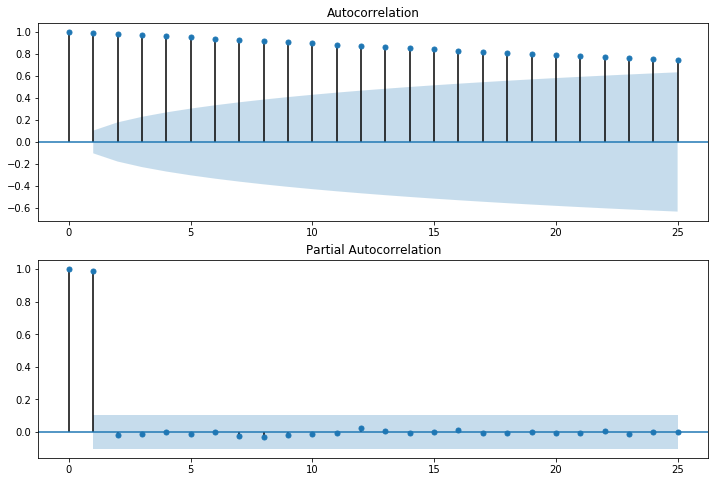

p = 1
q = 1


In [139]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=25, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts, lags=25, ax=ax2)

plt.show()

q = int(lag_acf[0])
p = int(lag_pacf[0])

print('p =', p)
print('q =', q)


# Применение модели ARIMA к временному ряду с тестовой выборкой

In [140]:
ts1 = read_csv('testing.csv', ',', parse_dates=['Date'],
                    index_col=['Date'], dayfirst=True)
tss1 = ts1.Value

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  359
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -120.367
Method:                       css-mle   S.D. of innovations              0.338
Date:                Wed, 13 Dec 2017   AIC                            248.734
Time:                        00:10:05   BIC                            264.267
Sample:                    02-01-1959   HQIC                           254.911
                         - 12-01-1988                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1176      0.036      3.271      0.001       0.047       0.188
ar.L1.D.Value     0.6531      0.091      7.185      0.000       0.475       0.831
ma.L1.D.Value    -0.2984      0.115     

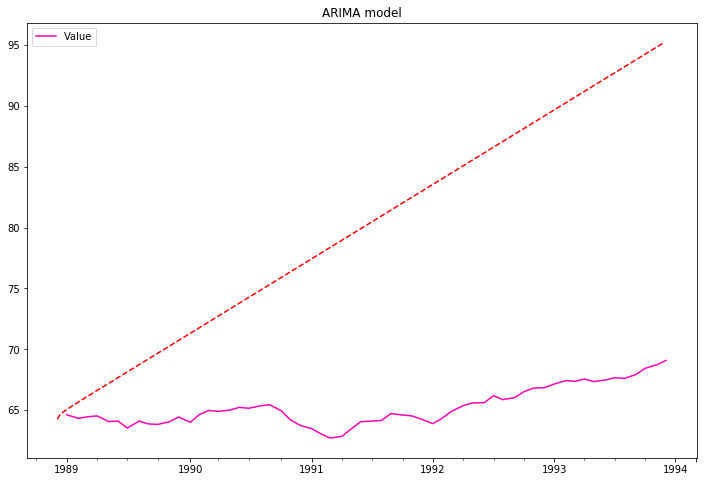

R2:  -289.164470783 
AIC: 248.7336572447515


In [141]:
model_ARIMA = sm.tsa.ARIMA(tss, order=(1, 1, 1), freq='W').fit()
print(model_ARIMA.summary())
result = model_ARIMA.predict('1988-12-01', '1993-12-01', typ='levels')
r2 = r2_score(ts1, result['1992-10-10':])
ts1.plot(figsize=(12, 8), color=sns.xkcd_rgb['bright pink'])
result.plot(style='r--')
plt.title("ARIMA model")
plt.show()
print("R2: ", r2, "\nAIC:", model_ARIMA.aic)